In [1]:
# =========================================================
# 📘 U.S. Census Data Analysis (2010–2015)
# =========================================================
# Author: Adejoro Raymond Olaotan
# Purpose: Analyze U.S. population trends using census data
# Dataset: co-est2015-alldata.csv
# Reference: Python Project_Census.pdf
# =========================================================

In [2]:
"""
## 🧰 Step 1: Environment Setup
We begin by importing the essential Python libraries for data manipulation, analysis, and visualization.
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")

# Create output directory for charts
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

def save_chart(fig, filename):
    """
    Save a matplotlib figure as a PNG image in the outputs directory.
    """
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f"✅ Chart saved: {filepath}")


In [4]:
## 🧭 Step 2: Data Loading and Initial Inspection

df = pd.read_csv("US Census Data 2015.csv", encoding='latin1')

print("✅ Dataset successfully loaded!")
print(f"Shape: {df.shape}")
print("\nColumns:\n", df.columns.tolist())
print("\nSample Data:")
print(df.head())

✅ Dataset successfully loaded!
Shape: (3193, 100)

Columns:
 ['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011', 'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015', 'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014', 'BIRTHS2015', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013', 'DEATHS2014', 'DEATHS2015', 'NATURALINC2010', 'NATURALINC2011', 'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015', 'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012', 'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015', 'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012', 'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010', 'NETMIG2011', 'NETMIG2012', 'NETMIG2013', 'NETMIG2014', 'NETMIG2015', 

In [5]:
# -----------------------------
# 3️⃣ Data Understanding & Cleaning
# -----------------------------
# Understanding SUMLEV codes
# SUMLEV 040 = State-level, 050 = County-level
print("\nUnique SUMLEV values:", df['SUMLEV'].unique())

# Filter to only county-level data (SUMLEV == 50)
counties = df[df['SUMLEV'] == 50].copy()

# Check for missing values
print("\nMissing values summary:\n", counties.isnull().sum().head())

# Verify unique states and counties
print(f"\nUnique states: {counties['STNAME'].nunique()}")
print(f"Unique counties: {counties['CTYNAME'].nunique()}")



Unique SUMLEV values: [40 50]

Missing values summary:
 SUMLEV      0
REGION      0
DIVISION    0
STATE       0
COUNTY      0
dtype: int64

Unique states: 51
Unique counties: 1877



Population summary (2010–2015):
       POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
count     3.142000e+03     3.142000e+03     3.142000e+03     3.142000e+03   
mean      9.845540e+04     9.921033e+04     9.996901e+04     1.007089e+05   
std       3.135478e+05     3.167040e+05     3.199686e+05     3.231351e+05   
min       8.300000e+01     9.000000e+01     8.100000e+01     8.900000e+01   
25%       1.108775e+04     1.108175e+04     1.101500e+04     1.103375e+04   
50%       2.584600e+04     2.579050e+04     2.583400e+04     2.574800e+04   
75%       6.691225e+04     6.688500e+04     6.709950e+04     6.749425e+04   
max       9.826009e+06     9.896602e+06     9.970436e+06     1.004518e+07   

       POPESTIMATE2014  POPESTIMATE2015  
count     3.142000e+03     3.142000e+03  
mean      1.014982e+05     1.022975e+05  
std       3.262347e+05     3.292097e+05  
min       8.700000e+01     8.900000e+01  
25%       1.099500e+04     1.098600e+04  
50%       2.568950e+0

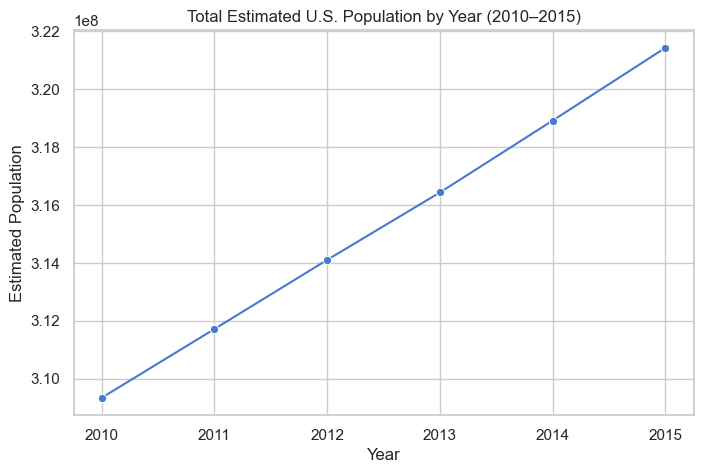

In [6]:
# -----------------------------
# 4️⃣ Exploratory Data Analysis (EDA)
# -----------------------------
# Descriptive statistics for population
pop_columns = [col for col in counties.columns if 'POPESTIMATE' in col]
print("\nPopulation summary (2010–2015):")
print(counties[pop_columns].describe())

# Trend of total population estimate over time
yearly_totals = [counties[col].sum() for col in pop_columns]
fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(x=range(2010,2016), y=yearly_totals, marker="o")
plt.title("Total Estimated U.S. Population by Year (2010–2015)")
plt.xlabel("Year")
plt.ylabel("Estimated Population")
save_chart(fig, "Total Estimated U.S. Population by Year (2010–2015).png")
plt.show()


Q1️⃣: State with the most counties:
 STNAME
Texas    254
Name: CTYNAME, dtype: int64


C:\Users\Radejoro\AppData\Local\Temp\ipykernel_24152\3955908406.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_county_counts.index[:10], y=state_county_counts.values[:10], palette="crest")


✅ Chart saved: outputs\Top 10 States by Number of Counties.png


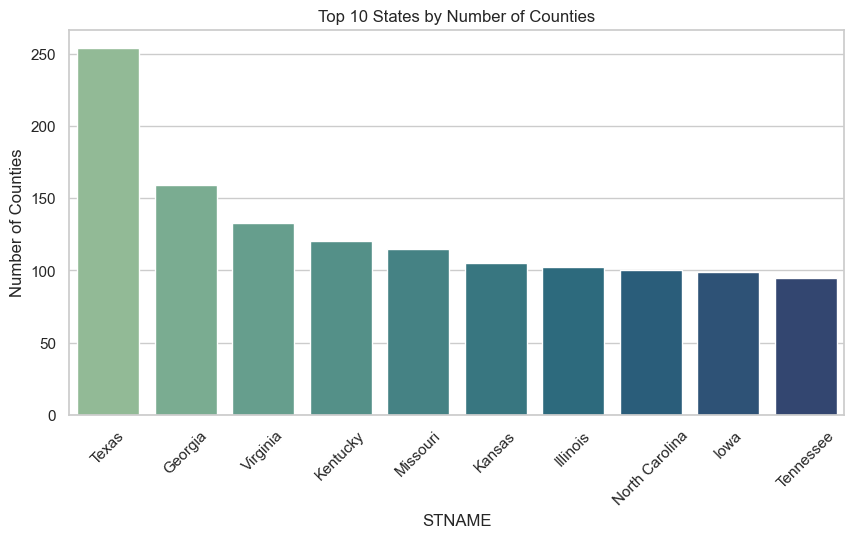

In [7]:
## 🔎 Step 5: Analytical Questions
### Q1️⃣: Which state has the most counties?

state_county_counts = counties.groupby('STNAME')['CTYNAME'].count().sort_values(ascending=False)
most_counties_state = state_county_counts.head(1)
print("\nQ1️⃣: State with the most counties:\n", most_counties_state)
plt.figure(figsize=(10,5))
sns.barplot(x=state_county_counts.index[:10], y=state_county_counts.values[:10], palette="crest")
plt.title("Top 10 States by Number of Counties")
plt.ylabel("Number of Counties")
plt.xticks(rotation=45)
save_chart(fig, "Top 10 States by Number of Counties.png")
plt.show()

C:\Users\Radejoro\AppData\Local\Temp\ipykernel_24152\3832532624.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_counties_per_state = counties.groupby('STNAME', group_keys=False).apply(lambda x: x.nlargest(3, 'CENSUS2010POP'))
C:\Users\Radejoro\AppData\Local\Temp\ipykernel_24152\3832532624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top3_states.index, y=top3_states.values, palette="Blues_r")


STNAME
California    15924150
Texas          8269632
Illinois       6815061
Name: CENSUS2010POP, dtype: int64
✅ Chart saved: outputs\Top 3 Most Populous States (Sum of Top 3 Counties).png


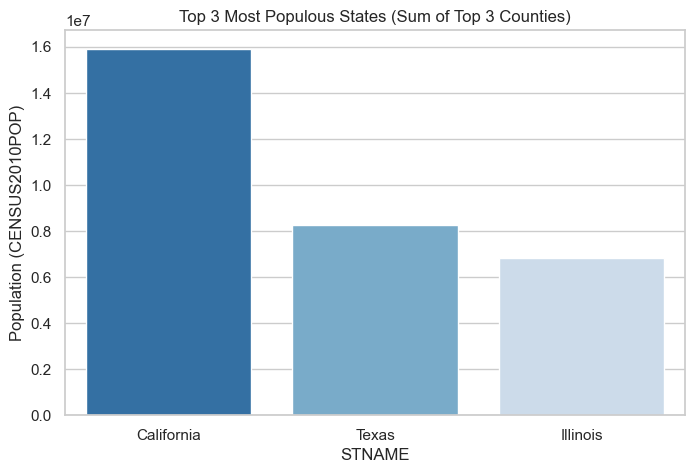

In [8]:
### Q2️⃣: Which are the 3 most populous states (based on 3 most populous counties each)?

top3_counties_per_state = counties.groupby('STNAME', group_keys=False).apply(lambda x: x.nlargest(3, 'CENSUS2010POP'))
state_pop_sum = top3_counties_per_state.groupby('STNAME')['CENSUS2010POP'].sum().sort_values(ascending=False)
top3_states = state_pop_sum.head(3)
print(top3_states)
plt.figure(figsize=(8,5))
sns.barplot(x=top3_states.index, y=top3_states.values, palette="Blues_r")
plt.title("Top 3 Most Populous States (Sum of Top 3 Counties)")
plt.ylabel("Population (CENSUS2010POP)")
save_chart(fig, "Top 3 Most Populous States (Sum of Top 3 Counties).png")
plt.show()

CTYNAME
Washington County    30
Name: STATE, dtype: int64
✅ Chart saved: outputs\Most Common County Name Across the U.S.png


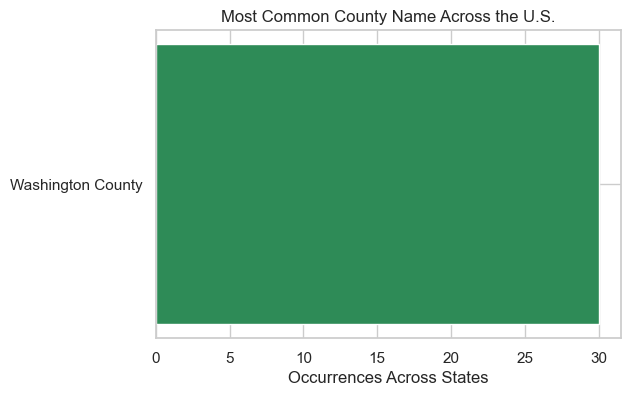

In [9]:
### Q3️⃣: Which county name is most common across states?
most_common_county_name = counties.groupby('CTYNAME')['STATE'].count().sort_values(ascending=False).head(1)
print (most_common_county_name)
plt.figure(figsize=(6,4))
plt.barh(most_common_county_name.index, most_common_county_name.values, color="#2E8B57")
plt.title("Most Common County Name Across the U.S.")
plt.xlabel("Occurrences Across States")
save_chart(fig, "Most Common County Name Across the U.S.png")
plt.show()

REGION
3    3
Name: DIVISION, dtype: int64


C:\Users\Radejoro\AppData\Local\Temp\ipykernel_24152\3403421902.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_division_counts.index, y=region_division_counts.values, palette="mako")


✅ Chart saved: outputs\Number of Divisions per U.S. Region.png


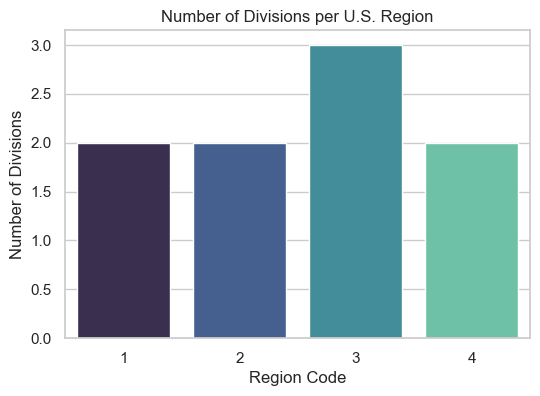

In [10]:
### Q4️⃣: Which region has the most divisions?

region_division_counts = df[['REGION', 'DIVISION']].drop_duplicates().groupby('REGION')['DIVISION'].count()
most_division_region = region_division_counts.sort_values(ascending=False).head(1)
print (most_division_region)
plt.figure(figsize=(6,4))
sns.barplot(x=region_division_counts.index, y=region_division_counts.values, palette="mako")
plt.title("Number of Divisions per U.S. Region")
plt.xlabel("Region Code")
plt.ylabel("Number of Divisions")
save_chart(fig, "Number of Divisions per U.S. Region.png")
plt.show()

REGION
1     56283891
2     67907403
3    121182847
4     76044679
Name: POPESTIMATE2015, dtype: int64


C:\Users\Radejoro\AppData\Local\Temp\ipykernel_24152\1938430477.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regions.index, y=regions.values, palette="viridis")


✅ Chart saved: outputs\Total Population by Region (2015).png


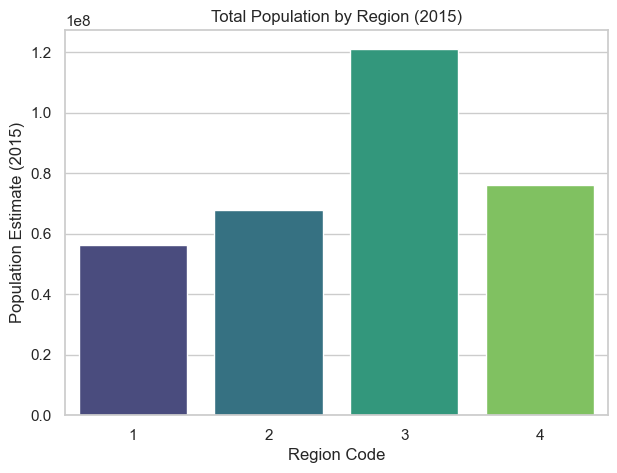

In [11]:
## 📈 Step 6: Bonus Insights

regions = df[df['SUMLEV'] == 40].groupby('REGION')['POPESTIMATE2015'].sum()
print (regions)
plt.figure(figsize=(7,5))
sns.barplot(x=regions.index, y=regions.values, palette="viridis")
plt.title("Total Population by Region (2015)")
plt.xlabel("Region Code")
plt.ylabel("Population Estimate (2015)")
save_chart(fig, "Total Population by Region (2015).png")
plt.show()

In [12]:
## 🧾 Step 7: Summary Report

print("\n================== SUMMARY REPORT ==================")
print(f"📍 State with most counties: {most_counties_state.index[0]} ({most_counties_state.values[0]} counties)")
print("\n🏆 Top 3 States (by population of 3 largest counties):")
for state, pop in top3_states.items():
    print(f"   - {state}: {pop:,}")

print(f"\n🏙️  Most common county name: {most_common_county_name.index[0]} ({most_common_county_name.values[0]} states share this name)")
print(f"\n🌎 Region with most divisions: Region {most_division_region.index[0]} ({most_division_region.values[0]} divisions)")
print("=====================================================")


================== SUMMARY REPORT ==================
📍 State with most counties: Texas (254 counties)

🏆 Top 3 States (by population of 3 largest counties):
   - California: 15,924,150
   - Texas: 8,269,632
   - Illinois: 6,815,061

🏙️  Most common county name: Washington County (30 states share this name)

🌎 Region with most divisions: Region 3 (3 divisions)
